# Lecture 17

- Goodness-of-fit measures

# Exam 2

## <font color=blue>Wednesday, November 2 @ 8:20PM - 10:20PM in FLG 0260 and FLG 0270</font>
**Students whose last name begins with A-M should go to FLG 0260, and those whose last name begins N-Z should go to FLG 0270.**

### Exam 2 Review Lecture: <font color=orange>Tuesday, November 1 (first half)</font>

Two **practice exams** (from last semester) is available in the Assignment-Solutions repo.

* Coverage: Lectures 8 to 17 (modules 6 and 7).

### Exam Details

All exams will have 2 parts:

**<font color=blue>Part 1 - Analytical.</font>**
* You are allowed 1-page letter-sized front and back of formulas (handwritten or typed).
* You are allowed a scientific calculator.
* **<font color=orange>TOTAL TIME:</font>** 1 hour
 

**<font color=blue>Part 2 - Simulation.</font>**
* Bring the computer you have been using with Anaconda installed.
* This part is open-book. You are allowed access to the textbooks and lecture materials (including assignments).
* You are allowed to use the internet, if needed.
* *Recommended*: create a python "cheat sheet" where you will add useful functions, simulations and other Python implementations.
* **<font color=orange>TOTAL TIME:</font>** 1 hour

**<font color=red>Communications between students or anyone else during the exam is considered cheating. Turn off all Slack notifications and other communications channels!</font>**

## Exam 2 Coverage

Exam 2 will cover all materials from Lectures 8-17. These include:

1. **Random Variables**
    * What are random variables?
    * Defining discrete and continuous RVs
    * Important discrete RVs:
        * Bernoulli, Binomial, Geometric, Poisson, Uniform
    * Probability Mass Functions (PMFs)
    * Important continuous RVs:
        * Uniform, Exponential, Gaussian
    * Probability Density Functions (PDFs)
    * Cumulative Distribution Functions (CDFs)
    * Expected Value
    * Moments of RV
        * Mean, Variance, Skewness, Kurtosis
    * Central Limit Theorem (CLT)
    * Kernel Density Estimation (KDE)
        * types of kernels (Gaussian, exponential, etc.)
        * bandwidth
    * Point Conditioning
        * Conditional Probability for continuous RVs
        * Law of Total Probability for continuous RVs
        * Bayes' Rule version for continuous RVs
    * Optimal Decisions
    
2. **Experimental Design, Decision and Analysis**
    * Sum of Independent Gaussian RVs
    * Hypothesis test for the difference of the means -- Gaussian, from CLT
    * Binary T-test
    * Hypothesis test errors
        * Type I error: False Positives
        * Type II error: False Negatives
    * Performance Trade-offs
        * Finding threshold for probability of false rejection, false acceptance
        * ROC curve
        * AUC of the ROC curve
    * Goodness-of-fit measures
        * For discrete RVs: chi-squared test
        * For continuous RVs: $r^2$ of the Q-Q plot
        * Q-Q plot vs probability plot
    * Contingency Tables
        * ```pandas``` dataframe manipulation
        * Expected contingency table
        * Degrees of freedom
        * Test of independence: Chi-Squared statistic

## How to prepare for exam

**This is a suggestion only.**

1. Review/read all Notebooks.

2. Create your formula sheet for part 1 and "common functions" Notebook for part 2.
    * You will be given a Q-function table.

3. Review/redo exercises from HW3.

4. Review/redo exercises from SA2 and SA3.

5. Review/redo exercises from Lecture 12 Recitation and Lecture 18 Recitation (upcoming). 

6. Solve practice exams 2.

## Last class

* We saw the **T-test** (unknown variance)
* **Tradeoffs in hypothesis testing** : how do our results depend on the level of alpha (confidence)?

## T-test

Unknown variance: we have to approximate the variance.

If we use our *unbiased* estimator for the variance, then the distribution of

\begin{align*}
\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}
\end{align*}

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on its [Wikipedia page](https://en.wikipedia.org/wiki/Student's_t-distribution).

* Unlike the Gaussian distribution, the distribution function for Student’s t-distribution is in closed form for several values of $\nu$ (degrees of freedom or dof).

## Errors and Performance Tradeoffs in Hypothesis Testing

* In binary hypothesis testing, there are two types of errors:

    1. **False Alarm** (Type I Error, also called *False Positive*)
        * occurs if we accept the alternate hypothesis ($H_1$) when it is not true; or reject the null hypothesis ($H_0$) when it is in fact true.
        * we will use the notation
        \begin{align*}
        P_{fa} = P(\text{false alarm})
        \end{align*}
        
        * $P_{fa} = \alpha$
    
    2. **Miss** (Type II Error, also called *False Negative*)
        * occurs if we reject an alternative hypothesis ($H_1$) when it is actually true; or accept the null hypothesis ($H_0$) when it is in fact false.
        * we will use the notation
        \begin{align*}
        P_m = P(\text{miss})
        \end{align*}

* When performing a hypothesis test, there is always a tradeoff between these two types of errors

* The tradeoff is controlled by choosing the significance level, $\alpha$, to which the p-value is compared with
    * the value $\alpha$ is the probability that we will reject the null hypothesis, $H_0$ when it is in fact true
    * equivalently, it is the probability of accepting the alternative hypothesis, $H_1$, when $H_1$ is false
   

## Visualizing Tradeoffs in Hypothesis Testing: ROC Curves

* We can visualize the relation between these types of errors using a ROC curve
    * ROC stands for *receiver operating characteristic*
    * ROC curves were developed for RADAR systems but are widely used in fields of statistical tests, such as biomedicine

* In ROC curves, we do not plot $P_{fa}$ vs $P_m$

* Instead:
    * the x-axis is **FPR (false positive rate)**
    \begin{align*}
    \text{FPR}=P_{fa}
    \end{align*}
    
    * the y-axis is **TPR (true positive rate)**
    \begin{align*}
    \text{TPR}=1-P_m
    \end{align*}

In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

## Today
* **Goodness-of-fit measures**
* **Contingency tables**: test of independence

___

# Testing Goodness-of-Fit

The goodness of fit of a statistical model describes how well it fits a set of observations. Measures of goodness of fit typically summarize the discrepancy between observed values and the values expected under the model in question.

## Testing Whether Data Comes from a Distribution: Discrete Distributions

* Given a set of random data and a proposed model, how could we determine if the data could have reasonably come from that model?

* For example, given values from a six-sided die, how could you tell if the die is fair? 

#### <font color=blue>Example 1</font>

In [51]:
# Draw 60 values from a fair 6-sided die:

dice = npr.randint(1,7,size=60)
dice

array([3, 4, 5, 5, 1, 4, 2, 2, 2, 3, 4, 3, 2, 2, 3, 1, 6, 3, 1, 3, 3, 6,
       5, 5, 3, 3, 1, 5, 5, 2, 2, 5, 1, 6, 4, 2, 6, 6, 2, 2, 2, 5, 2, 1,
       2, 6, 4, 5, 1, 4, 5, 2, 2, 4, 4, 6, 5, 1, 3, 2])

In [52]:
vals, counts = np.unique(dice, return_counts=True)

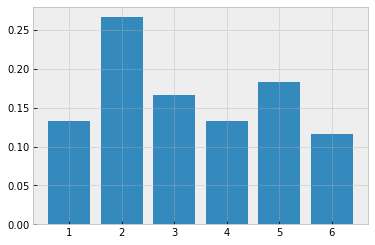

In [53]:
plt.bar(vals, counts/60);

* Even after 60 rolls, the numbers still vary significantly

* We could compare them to the expected values:

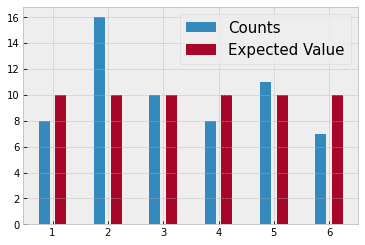

In [54]:
plt.bar(vals-0.15, counts, width=0.2, label='Counts')
plt.bar(vals+0.15, [60*1/6], width=0.2, label='Expected Value')
plt.legend(fontsize=15);

#### <font color=blue>Example 2</font>

The file "baseball.pickle" contains the birth months of major league baseball players.

> [```pickle```](https://docs.python.org/3/library/pickle.html) is a Python object serialization library.

In [55]:
import pickle

In [56]:
pf = open('baseball.pickle','rb')

In [57]:
df = pickle.load(pf)
pf.close()

In [58]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
num_players,1398.0,1213.0,1350.0,1221.0,1229.0,1157.0,1317.0,1558.0,1382.0,1526.0,1406.0,1350.0


In [59]:
baseball = df.loc['num_players'].to_numpy()
baseball

array([1398., 1213., 1350., 1221., 1229., 1157., 1317., 1558., 1382.,
       1526., 1406., 1350.])

In [60]:
months = df.columns.to_numpy()
print(months)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


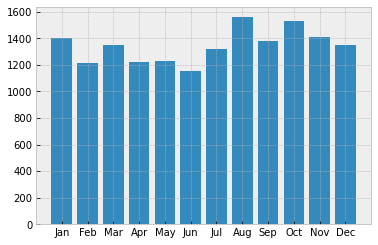

In [61]:
plt.bar(months, baseball);

Observations and Comments:

* Note that more MLB players are born in August than any other month

* Some people claim that this is because in little league baseball through 2006, the cutoff for determing a player's age eligibility was July 31st

* That is, a player who was turning 9 that year would not be eligible to play in the 8 & Under league if their birthday was before August 1st. 

* Thus, players with July birthdays were the youngest (and, on average, smallest) in their leagues, and player with August birthdays were the oldest (and, on average, largest)

Let's start by comparing the data values in the cells to the expected values for those cells 

* **We assume a uniform distribution of birthdays over the year**

In [ ]:
total_players = ##

total_players

Then we can get the expected number of birthdays in a month as the probability a player is born in a month (which is just the number of days in the month divided by 365) times the total number of players in the table:

In [ ]:
days_in_month=np.array([31,28,31,30,31,30,31,31,30,31,30,31])

In [ ]:
# Expected value (assuming a uniform distribution)

ref = 

Now we can compare the data to the expected values:

In [ ]:
plt.bar(np.arange(12)-0.15, ##, width=0.2, label='Counts')
plt.bar(np.arange(12)+0.15, ##, width=0.2, label='E[]')
plt.legend()
plt.ylim(0,1800)
plt.xticks(np.arange(12), months);

Observations:

* August through November seem to be overrepresented, but how can we test it, with 12 different values?

* Let's start by computing the errors:

In [ ]:
# Errors = observed- reference

errors = ##

# Stem plot of errors
#

* Now we need to turn the errors into a single test statistic

* Note that the errors are both positive and negative

* We solve this in the same way we have before, let's start by looking at the total squared error (also called the total deviation):

In [ ]:
E2_sum = ##
E2_sum

* Then we can carry out our statistical test in the usual way

* We draw examples from the distribution under $H_0$ and then see how often we get such a large total deviation:

In [ ]:
# RV under the H0 - assuming data is Uniformly-distributed

bballRV = ##

# This RV models the number of baseball players born in each month of the year

In [ ]:
players = ##
print(players)

vals, counts = ##
print(vals, counts)

In [ ]:
ref = ##

num_sims=1000
count=0
for sim in range(num_sims):
    players = ## # sample size should be the same as the original sample
    vals, counts = ##
    
    test_errors = ## # computes elementwise errors
    test_E2sum = ## # sum of the squared errors
    if ##:
        count+=1
        
print('Prob of seeing a result this extreme is', count/num_sims)

**Conclusion:** 
<!-- The result is statistically significant. MLB players' birthdays are not uniformly distributed throughout the year. -->

* Note that some months have more days than others. Those months will naturally have more variation than months with more days because the expected counts will be smaller

* To compensate for this effect, it is instead common to normalize the cell deviations by dividing by the expected value of that cell:

In [ ]:
# squared errors divided by the expected values

Cvals = ## 

Cvals

After normalizing, we can again calculate a statistic that is a sum of the normalized deviations:

In [ ]:
Chisq = ##

Chisq

For reasons we will discuss later, this is called the **chi-squared statistic** with $N-1$ degrees of freedom (dof), i.e.

\begin{align*}
\sum_{i=1}^N \frac{(O_i - E_i)^2}{E_i} \sim \chi^2(\text{dof}= N-1)
\end{align*}

where $O_i$ is the observed value, $E_i$ is the expected value and $N$ is the total number of random values.

In [ ]:
x = np.linspace(0,20,1000)

plt.figure(figsize=(8,5))
Chi2_RV = ##
plt.plot(x, ##)
print('p-value = ', ##)

In [ ]:
x = np.linspace(0,50,1000)
plt.figure(figsize=(8,5))
for dof in range(2,11):
    C = ## 
    plt.plot(x, ##, label='dof='+str(dof))
    print('Chi-square with dof = ',dof,', Moments: ', C.stats('mvsk'))
plt.legend();


In [ ]:
print('p-value = ', )

We can carry out a similar simulation test as above.

In [ ]:
num_sims=1000
count=0
for sim in range(num_sims):
    players = ##
    vals, counts = ##
    test_E2= ##
    test_chi2 = ##
    if test_chi2 >= Chisq:
        count+=1

print('Prob of seeing a result this extreme is',count/num_sims)

**Conclusion:** 
<!-- The result is statistically significant. MLB players' birthdays are not uniformly distributed throughout the year. -->

___

#### <font color=blue>Example 3: try at home</font>

Instead, let's try another baseball example:

(From *Mathematical Statistics with Resampling and R* By Laura M. Chihara, Tim C. Hesterberg)

The file "homeruns.pickle" contains the homerun data for the Philadelphia Phillies in 2009.

Each entry is the number of games with the corresponding index number of homeruns:

* What distribution might this come from??
<!--     * Poisson? -->

* What do we need to specify that distribution?
<!--     * Need the average number of HRs/game (i.e., the mean of the distribution) -->

It looks like a good fit. BUT we should test it:

We think that this probably comes from this Poisson distribution. If so, the simulation should produce a p-value >> 0.055

In [ ]:
num_sims=1000
count=0
for sim in range(num_sims):
    
    
    
    
        
print('Prob of seeing a result this extreme is',count/num_sims)

**Conclusion:** 

<!-- It is likely that this data matches a Poisson distribution. -->

___

## Testing Whether Data Comes from a Distribution: Continuous Distributions 

#### <font color=blue>Example 4</font> 

Consider the data in "lightbulb.pickle".

In [ ]:
file = ##

In [ ]:
lb = ## 

file.##

How should we determine what distribution this data comes from?

* Let's look at what sorts of values we got:

In [ ]:
print(lb[:50])

The values seem to be coming from throughout the positive real line -- this data is from a continous distribution. 


Now we need to try to determine which continuous distribution is a good fit for the data.

1. Start by plotting a histogram of the data. Adjust the number of bins to provide an appropriate amount of resolution to help infer what distribution this might be from.

Clearly the data is not Gaussian/Normal or Uniform. 

* Of the distributions we have considered, this seems to match the exponential random variable. 

Assuming that this is from an exponential distribution, we can compare the histogram of the data with that from the theoretical model. The exponential distribution is characterized by a single parameter, either $\lambda$ or $\mu=1/\lambda$, which is the mean.

2. Let's estimate the mean of the reference distribution. We know that the sample mean estimator is an unbiased estimate of the mean:

In [ ]:
# Estimate for the sample mean

mu_hat = ##
mu_hat

3. Now create an exponential random variable object and draw data from this reference distribution:

In [ ]:
E = ## 

In [ ]:
# randomly sampling values from this exponential RV

ref = ##

In [ ]:

_, mybins, _ = plt.hist(lb, bins=20, alpha=0.3, label='Training Data')
plt.hist(ref, bins = ## #, alpha=0.3, label='Reference from the Exponential')
plt.legend();

The match is not perfect, but they are similar. 

* Since this data comes from a continuous distribution, kernel density estimation (KDE) may be better than a histogram!

___

## Quantile-Quantile (Q-Q) Plot

Let's investigate other ways that we can visually compare these data. We will first generate a **quantile-quantile (Q-Q) plot** for the data.

* The $k$th **quantile** from a data set of length $n$ is the data point that is $k/n$th of the way through the ordered set.  

* In a Q-Q plot, we plot the data at a particular quantile in one data set vs the data at a particular quantile in another data set. 

Read the wikipedia page on Q-Q plots: https://en.wikipedia.org/wiki/Q–Q_plot

We will only consider the easiest case, which is when the data sets are of the same size. In that case, we can just plot the sorted values with respect to each other:




In [ ]:
# random sample from the exponential 

ref = ##

In [ ]:
# Plot against each other
##
plt.title('Q-Q Plot for data vs Exponential RV')
plt.xlabel('Quantiles for the Exponential RV')
plt.ylabel('Quantiles for the Observed Data');

If the data is from the same distribution, the plot should be approximately linear!

When we are comparing data to a known distribution, we can get the exact quantiles from the distribution of the random variable, rather than using samples from the random variable. 

Sometimes this type of plot is called a **probability plot**. More generally, the term probability plot is sometimes used to refer to a broader class of plots including the Q-Q plot. **We can get the quantiles from a distribution using the inverse CDF (in ```scipy.stats```, this is called the percent point function (ppf):**

In [ ]:
cumulative_prob = ## 

## Scatter plot


We observe that the function is even more linear. It has a little less variation because we have eliminated one of the sources of randomness in the Q-Q plot.

Finally, we leverage the ```scipy.stats``` ```probplot``` method to generate the same plot directly:

Read the docstring for the ```stats.probplot``` method:

Note that we can only use ```stats.probplot``` for distributions that ```scipy.stats``` knows (but that is A LOT).

After you have read the docstring and understand the outputs, let's store those and look at them: 

We are not yet ready to talk in detail about linear regression, but basically it is finding the best line to fit a set of data (when the error is mean-squared error).

The regression parameters are (from the docstring): (slope, intercept, r)

You all should be familiar with the slope and intercept of a line. The parameter ```r``` (usually written $r$ in text) measures how close the data fits the line. We will work with $r^2$ instead. The closer $r^2$ is to 1, then the better the line fits the quantiles (and the better our reference distribution fits the data). We will consider the reference distribution to be a good match for the data if $r^2 \ge 0.9$.

Let's check how well the exponential distribution fits our data:

In [ ]:
r = ##

print('R^2 or Coefficient of Determination: ', ##)

**Conclusion:** 

<!-- Since $r^2 \approx 0.9979 > 0.9$, the exponential distribution is an excellent fit to this data set. -->

# What is a Contingency Table?

<div class="alert alert-info">
  <strong>Contingency Table</strong>

A **contingency table**, sometimes called *cross-tabulation* or *two-way table*, is a type of table in a matrix format that displays (multivariate) categorical data in terms of frequency counts.

More precisely, an $r\times c$ contingency table shows the observed frequency of two variables, the observed frequencies of which are arranged into $r$ rows and $c$ columns. The intersection of a row and a column of a contingency table is called a cell.
</div>

* Contingency tables are great to summarize (large) data sets

* Contingency tables are used for organizing categorical variables and testing hypothesis with the chi-squared test for independence

For example, the contingency table below has two rows and five columns (not counting header rows/columns) and shows the results of a random sample of 2200 adults classified by two variables, namely gender and favorite way to eat ice cream.

|  |   cup   |  cone   | sundae  | sandwich |  other  |
|--------|---------|---------|---------|----------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |
| female |   410   |   335   |   180   |    20    |    55   |

One benefit of having data presented in a contingency table is that it allows one to more easily perform basic probability calculations, a feat made easier still by augmenting a summary row and column to the table.

|  |   cup   |  cone   | sundae  | sandwich |  other  |  total  |
|--------|---------|---------|---------|----------|---------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |   1200  |
| female |   410   |   335   |   180   |    20    |    55   |   1000  |
|  total |   1002  |   635   |   384   |    44    |   135   |   2200  |

The above table is an extended version of the first table obtained by adding a summary row and column. These summaries allow easier computation of several different probability-related quantities.

## Marginal Total

The numbers in every cell are called **marginal totals**. The grand total (the total number of individuals represented in the contingency table) is the number in the bottom right corner.

The table allows users to see at a glance that the proportion of men who like to eat their ice cream in a cone is about the same as the proportion of women who like to eat their ice cream in a cone although the proportions are not identical.

## Conditional Probability

If the proportions of individuals in the different columns vary significantly between rows (or vice versa), it is said that there is a *contingency* between the two variables. In other words, the two variables are **not independent**. If there is no contingency, it is said that the two variables are independent.

## Expected Frequency

One useful value to know is the **expected frequency** $E_{r,c}$ of the cell at the intersection of column c and row r, the formula for which is given by

$$E_{c,r} = \frac{\text{(sum of row }r\text{)}\times\text{(sum of column }c\text{)}}{\text{sample size}}$$

#### <font color=blue>Example 5</font> 

From the contingency table below, compute:

|  |   cup   |  cone   | sundae  | sandwich |  other  |  total  |
|--------|---------|---------|---------|----------|---------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |   1200  |
| female |   410   |   335   |   180   |    20    |    55   |   1000  |
|  total |   1002  |   635   |   384   |    44    |   135   |   2200  |

1. Probability that a random participant prefers their ice cream in a cup? 

<!-- $$\frac{1002}{2200}$$ -->

2. Probability that a random participant prefers their ice cream in a sandwich? 

<!-- $$\frac{44}{2200}$$ -->

3. Probability that a random participant is female? 

<!-- $$\frac{1000}{2200}$$ -->

4. Probability that a person prefers ice cream sandwiches given that the person is male? 

<!-- $$P(\text{sandwich}|\text{male}) = \frac{P(\text{sandwich} \cap \text{male})}{P(\text{male})} = \frac{24}{1200}$$ -->

5. Probability that a person is male given that ice cream sandwiches are preferred? 

<!-- $$P(\text{male}|\text{sandwich}) = \frac{24}{44}$$ -->

6. Expected value of men who prefer to eat ice cream from a cup? 

<!-- $$\frac{1200 \times 1002}{2200} \approx 546.54$$ -->

7. Expected value of women who prefer to eat ice cream from a sundae? 

<!-- $$\frac{1000 \times 384}{2200} \approx 174.54$$ -->

8. What are the variables of study? 

<!-- Gender and preferred way to eat ice cream. -->

9. How many degrees of freedom does this contingency table have? 

<!-- $$(2-1) \times (5-1) = 4$$ -->

## Chi-Squared Test & Independence

One of the major benefits of computing expected frequencies is the ability to test whether the two variables are actually *independent*. This is done by computing, for each cell (c,r), the expected frequency $E_{c,r}$, comparing it to the observed frequency $O_{c,r}$, and then performing the **chi-squared test**.

$$\chi^2 = \sum_{\text{all cells}} \frac{(O_{c,r}-E_{c,r})^2}{E_{c,r}} = \sum_c \sum_r \frac{(O_{c,r}-E_{c,r})^2}{E_{c,r}}$$

This statistic is called a $\chi^2$ as it follows a [$\chi^2$ distribution with $k$ degrees of freedom](https://en.wikipedia.org/wiki/Chi-squared_distribution).

* The degrees of freedom can be computed as $(\text{# rows}-1)\times (\text{# columns}-1)$

* In the example above, there are 4 degrees of freedom

In [ ]:
x = np.linspace(0,20,1000)

plt.figure(figsize=(8,5))
for i in range(2,11):
    C = stats.chi2(i)
    plt.plot(x,C.pdf(x),label='k = '+str(i))

plt.legend();

### Chi-Squared ($\chi^2$) RV and Gaussian RV

If $Y_1, \dots, Y_k$ independent identically distributed (i.i.d.), standard normal random variables, that is, $Y_i \sim G(0,1)$, then

$$Z = \sum_{i=1}^k Y_i^2$$

$Z$ is distributed as $\chi^2$ with $k$ degrees of freedom, $Z \sim \chi^2(k)$.

In other words, the chi-square distribution with $k$ degrees of freedom is the distribution of a sum of the squares of $k$ independent Normal random variables.

In [ ]:
N = 10_000
x = np.linspace(0,20,N)

dof = 5
C = stats.chi2(dof)
G = stats.norm()

sum_kG = 0
for i in range(dof):
    #
    #
    
plt.plot(x,C.pdf(x),label='$\chi^2$(dof='+str(dof)+')')
plt.plot(x, stats.gaussian_kde(sum_kG)(x), label='KDE estimate for $\chi^2=(dof=$'+str(dof)+')')
plt.hist(sum_kG,density='True', label='Sum of '+str(dof)+' Normal dist.')
plt.legend();

#### <font color=blue>Example 6</font> 

Carry the independence test for the two variables in the following contingency tables:

|  |   cup   |  cone   | sundae  | sandwich |  other  |  total  |
|--------|---------|---------|---------|----------|---------|---------|
|  male  |   592   |   300   |   204   |    24    |    80   |   1200  |
| female |   410   |   335   |   180   |    20    |    55   |   1000  |
|  total |   1002  |   635   |   384   |    44    |   135   |   2200  |

In [ ]:
# H0: 
# H1: 

# Statistic: 

In [ ]:
observed = ##

observed

In [ ]:
E = ##
print(E)

In [ ]:
print(##)

Observations: 
* The columns and rows sum to 0
* Cannot use the sum of the error (defined as the different between observed and expected) as it always sums to 0. Instead let's consider the squared of the error

In [ ]:
print(##)

Observations:

* Some cells have larger expected values and more observations than others

* A difference of 10 in a cell of expected value of 5 is more significant than a difference of 10 in a cell of expected value of 100

* We can take into account the expected cell size

In [ ]:
print(##)

In [ ]:
C = ##
C

Given this statistic, how can we determine if this result is statistically significant with $\alpha=0.01$? We need to find the $p$-value under the null Hypothesis $$H_0:\text{variables gender and favorite way to eat ice cream are independent}$$

There are two approaches: 
1. Resampling (permutation)
2. Analytical Solution (Chi-Squared test)

In [ ]:
# Analytical Solution

x = np.linspace(0,30,100)
chi = ##

plt.plot(x, ##)
plt.scatter(C, ##, s=##, c=##)

print(' The probability of observing a table this extreme is equal to ',##)

In [ ]:
# Resampling solution
# 0 - cup, 1 - cone, 2 - sundae, 3 - sandwich, 4 - other

sample = ##

perm_sample = ##
male = ##
female = ##


In [ ]:
num_sims=10_000
count=0

for i in range(num_sims):
    perm_sample = ##
    male = ##
    female = ##
    CT = ##
    
    sampleC = ##
    
    if ##:
        count+=1

    
    
    
print("Probability of observing a table this extreme under H0 is ~",count/num_sims)

**Conclusion:** 

<!-- We reject the null hypothesis. The two variables are **not** independent. -->